In [164]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
df = pd.read_csv(uri)
df.head(10)

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170
5,1,33,173
6,1,64,1965
7,1,99,1993
8,1,45,278
9,0,96,12479


In [165]:
# para que não pareça ambíguo, irei trocar a coluna
# que está como unfinished para finished.

switch = {
    0:1,
    1:0
}

df['finished'] = df.unfinished.map(switch)
df = df.drop(axis = 1, labels = 'unfinished')
df.head()

,expected_hours,price,finished
0,26,192,0
1,88,9015,0
2,89,2577,0
3,42,275,0
4,39,170,0


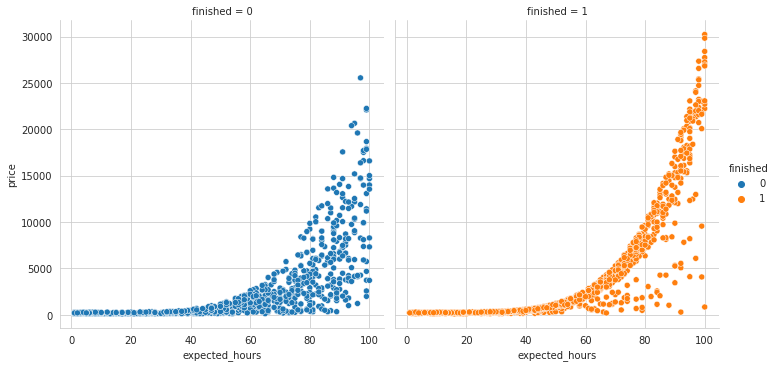

In [166]:
sns.set_style("whitegrid")
sns.relplot(y = 'price', 
            x = 'expected_hours', 
            hue = 'finished',
            col = 'finished', 
            data = df)

In [167]:
df[['expected_hours', 'price']].corr()

,expected_hours,price
expected_hours,1.000000,0.698111
price,0.698111,1.000000


In [168]:
df[['expected_hours', 'price']].mean()

expected_hours      50.515531
price             3140.696801
dtype: float64

In [169]:
df[['expected_hours', 'price']].std()

expected_hours      28.589513
price             5079.220196
dtype: float64

## Classificação pelo Linear Support Vector Classification

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

x = df[['expected_hours', 'price']]
y = df[['finished']]

SEED = 5
np.random.seed(SEED)
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size = 0.25,
                                                    random_state = SEED,
                                                    stratify = y
                                                    )

In [171]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1617, 2), (540, 2), (1617, 1), (540, 1))

In [172]:
model = LinearSVC(random_state=SEED)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
accuracy

/home/gabriel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/gabriel/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.5407407407407407

In [173]:
x_min = x_test.expected_hours.min()
x_max = x_test.expected_hours.max()
y_min = x_test.price.min()
y_max = x_test.price.max()

xaxis = np.arange(x_min, x_max, (x_max - x_min)/100)
yaxis = np.arange(y_min, y_max, (y_max - y_min)/100)

In [174]:
xx, yy = np.meshgrid(xaxis, yaxis)

cordinates = np.c_[xx.ravel(), yy.ravel()]
xx

array([[ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       ...,
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01]])

In [175]:
z = model.predict(cordinates)
z = z.reshape(xx.shape)
xx.shape, yy.shape, z.shape

((100, 100), (100, 100), (100, 100))

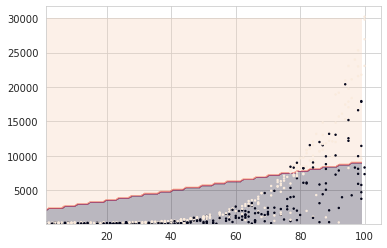

In [176]:
plt.contourf(xx ,yy ,z, alpha=0.3)
plt.scatter(x_test.expected_hours, 
            x_test.price, 
            c = y_test.finished,
            s = 2)

## Classificação pelo Support Vector Classification
#### Este permite que o relacionamento não se restrinja a ser totalmente linear

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

x = df[['expected_hours', 'price']]
y = df[['finished']]

SEED = 5
np.random.seed(SEED)
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size = 0.25,
                                                    random_state = SEED,
                                                    stratify = y
                                                    )

model = SVC(random_state=SEED)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
accuracy

/home/gabriel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.5518518518518518

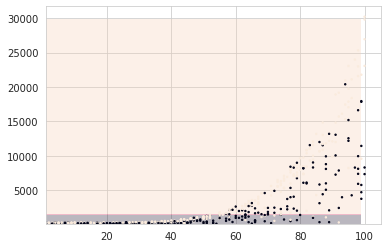

In [178]:
x_min = x_test.expected_hours.min()
x_max = x_test.expected_hours.max()
y_min = x_test.price.min()
y_max = x_test.price.max()

xaxis = np.arange(x_min, x_max, (x_max - x_min)/100)
yaxis = np.arange(y_min, y_max, (y_max - y_min)/100)

xx, yy = np.meshgrid(xaxis, yaxis)

cordinates = np.c_[xx.ravel(), yy.ravel()]

z = model.predict(cordinates)
z = z.reshape(xx.shape)
xx.shape, yy.shape, z.shape

plt.contourf(xx ,yy ,z, alpha=0.3)
plt.scatter(x_test.expected_hours, 
            x_test.price, 
            c = y_test.finished,
            s = 2)

## Uso do Standard Scaler para padronizar as variáveis de treino e teste

In [179]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

x = df[['expected_hours', 'price']]
y = df[['finished']]

SEED = 5
np.random.seed(SEED)
raw_x_train, raw_x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size = 0.25,
                                                    random_state = SEED,
                                                    stratify = y
                                                    )

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = SVC(random_state=SEED)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
accuracy

/home/gabriel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.6685185185185185

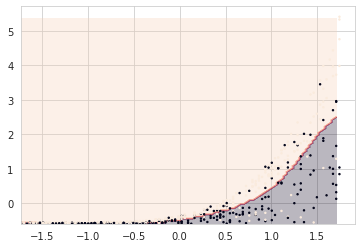

In [180]:
data_x = x_test[:,0]
data_y = x_test[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

xaxis = np.arange(x_min, x_max, (x_max - x_min)/100)
yaxis = np.arange(y_min, y_max, (y_max - y_min)/100)

xx, yy = np.meshgrid(xaxis, yaxis)

cordinates = np.c_[xx.ravel(), yy.ravel()]

z = model.predict(cordinates)
z = z.reshape(xx.shape)
xx.shape, yy.shape, z.shape

plt.contourf(xx ,yy ,z, alpha=0.3)
plt.scatter(data_x, 
            data_y, 
            c = y_test.finished,
            s = 2)